<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)
younis=cv2.imread('../DATA/mmm.jpg',0)

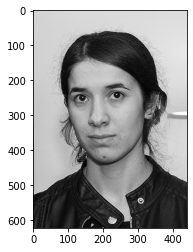

In [3]:
plt.imshow(nadia,cmap='gray')

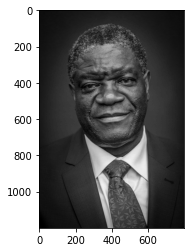

In [4]:
plt.imshow(denis,cmap='gray')

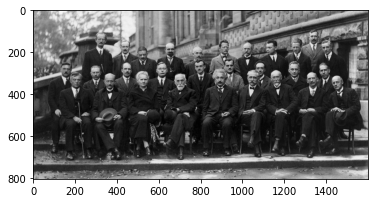

In [5]:
plt.imshow(solvay,cmap='gray')

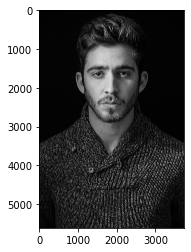

In [6]:
plt.imshow(younis,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [7]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_alt.xml')

In [8]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [9]:
result = detect_face(denis)

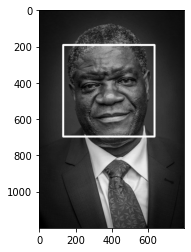

In [10]:
plt.imshow(result,cmap='gray')

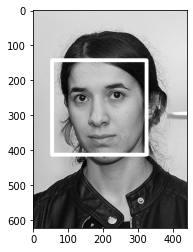

In [11]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

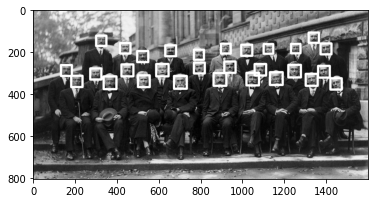

In [12]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

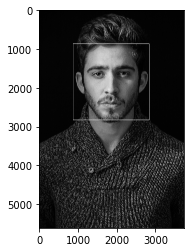

In [13]:
result = detect_face(younis)
plt.imshow(result,cmap='gray')

In [16]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

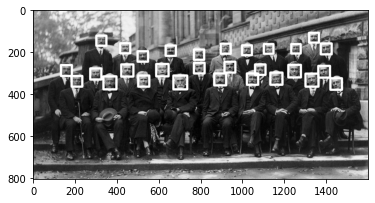

In [17]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

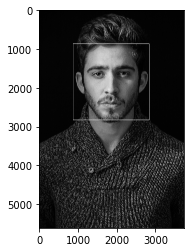

In [18]:
result = detect_face(younis)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [19]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

In [20]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

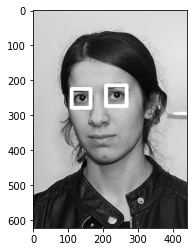

In [21]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

In [22]:
eyes = eye_cascade.detectMultiScale(denis) 

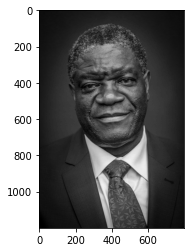

In [23]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

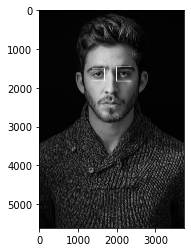

In [24]:
result = detect_eyes(younis)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Conjunction with Video

In [25]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-4kjsgr0j\opencv\modules\highgui\src\window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
